In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Churn_ModelLing.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# Removing the unnecassary features from the dataset
dataset= dataset.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [5]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


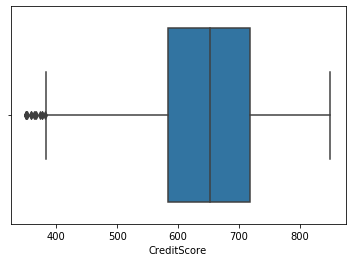

In [6]:
import seaborn as sns
sns.boxplot(x=dataset["CreditScore"])

In [7]:
q1 = dataset["CreditScore"].quantile(0.25)  
q3 = dataset["CreditScore"].quantile(0.75)  
IQR = q3-q1
IQR

134.0

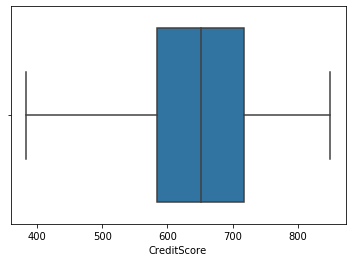

In [8]:
dataset=dataset[~((dataset["CreditScore"]<(q1-1.5*IQR))|(dataset["CreditScore"]>(q3 + 1.5*IQR)))]
sns.boxplot(x=dataset["CreditScore"])

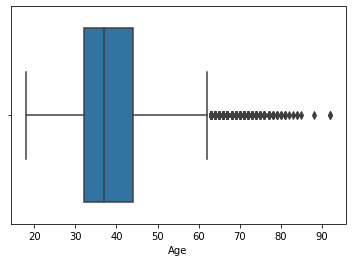

In [9]:
sns.boxplot(x=dataset["Age"])

In [10]:
q1 = dataset['Age'].quantile(0.25)  
q3 = dataset['Age'].quantile(0.75)  
IQR = q3-q1
IQR

12.0

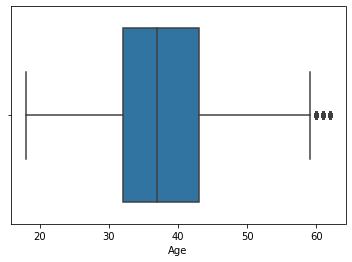

In [11]:
dataset=dataset[~((dataset['Age']<(q1-1.5*IQR))|(dataset['Age']>(q3 + 1.5*IQR)))]
sns.boxplot(x=dataset["Age"])

In [12]:
q1 = dataset['Age'].quantile(0.25)  
q3 = dataset['Age'].quantile(0.75)  
IQR = q3-q1
IQR

11.0

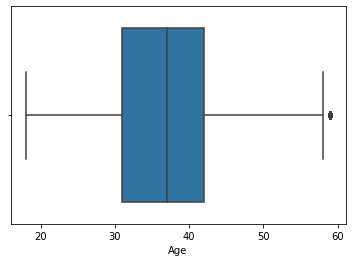

In [13]:
dataset=dataset[~((dataset['Age']<(q1-1.5*IQR))|(dataset['Age']>(q3 + 1.5*IQR)))]
sns.boxplot(x=dataset["Age"])

In [14]:
q1 = dataset['Age'].quantile(0.25)  
q3 = dataset['Age'].quantile(0.75)  
IQR = q3-q1
IQR

11.0

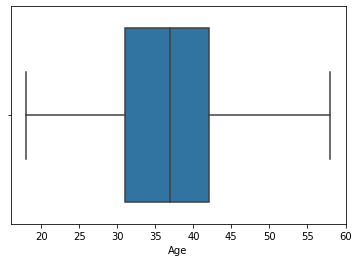

In [15]:
dataset=dataset[~((dataset['Age']<(q1-1.5*IQR))|(dataset['Age']>(q3 + 1.5*IQR)))]
sns.boxplot(x=dataset["Age"])

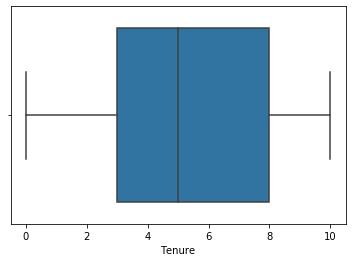

In [16]:
sns.boxplot(x=dataset['Tenure'])

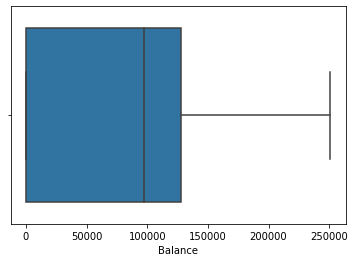

In [17]:
sns.boxplot(x=dataset['Balance'])

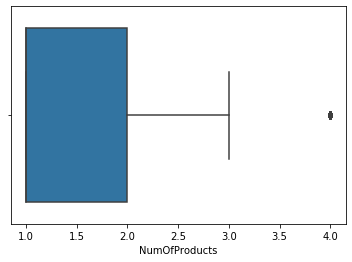

In [18]:
sns.boxplot(x=dataset['NumOfProducts'])

In [19]:
q1 = dataset['NumOfProducts'].quantile(0.25)  
q3 = dataset['NumOfProducts'].quantile(0.75)  
IQR = q3-q1
IQR

1.0

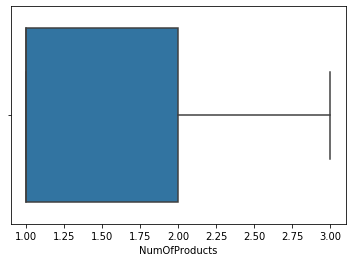

In [20]:
dataset=dataset[~((dataset['NumOfProducts']<(q1-1.5*IQR))|(dataset['NumOfProducts']>(q3 + 1.5*IQR)))]
sns.boxplot(x=dataset["NumOfProducts"])

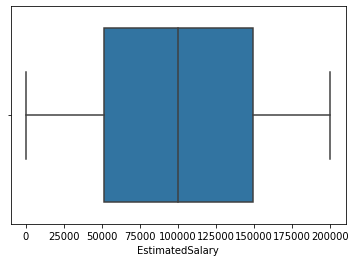

In [21]:
sns.boxplot(x=dataset['EstimatedSalary'])

In [22]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
dataset.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [24]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataset.iloc[:,2]=lb.fit_transform(dataset.iloc[:,2])

In [25]:
x = dataset.iloc[:,0:10].values
x

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [26]:
y = dataset.iloc[:,10].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [28]:
ct = ColumnTransformer([("on",OneHotEncoder(),[1])],remainder="passthrough")
x=ct.fit_transform(x)
x=x[:,1:]
x

array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

In [29]:
#normalization using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.57706189, -0.57557881, -0.33143273, ...,  0.64667192,
         1.0005353 ,  0.02096093],
       [-0.57706189,  1.73738154, -0.44607943, ..., -1.54637918,
         1.0005353 ,  0.21569963],
       [-0.57706189, -0.57557881, -1.55085668, ...,  0.64667192,
        -0.99946498,  0.23986412],
       ...,
       [-0.57706189, -0.57557881,  0.60658569, ..., -1.54637918,
         1.0005353 , -1.01005274],
       [ 1.73291637, -0.57557881,  1.26319859, ...,  0.64667192,
        -0.99946498, -0.12622538],
       [-0.57706189, -0.57557881,  1.47164713, ...,  0.64667192,
        -0.99946498, -1.07781123]])

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [31]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',C=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

C:\Users\SHIRANJEEEVI\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1873,   39],
       [ 266,  158]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8694349315068494